In [0]:
import numpy as np
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

In [0]:
mx = np.mean(x)
my = np.mean(y)

In [3]:
mx, my

(5.0, 90.5)

In [0]:
# (x - x평균)**2의 합
divisor = sum([(i-mx)**2 for i in x])

In [5]:
divisor

20.0

In [0]:
# (x - x평균) * (y - y평균)의 합
def top(x, mx, y, my):
  d = 0
  for i in range(len(x)):
    d += (x[i] - mx) * (y[i] - my)
  return d
dividend = top(x, mx, y, my)

In [9]:
dividend

46.0

In [0]:
a = dividend / divisor # 최소제곱법
b = my - (mx * a) # y의 평균 - (x의 평균 * 기울기 a)

In [14]:
print('기울기:',a)
print('절편:', b)

기울기: 2.3
절편: 79.0


In [0]:
fake_a_b = [3, 76]

In [0]:
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

In [0]:
# y = ax + b
def predict(x):
  return fake_a_b[0] * x + fake_a_b[1]

$$ mse = \frac{1}{n}\sum{(\hat y_i-y_i)^2}$$

In [0]:
def mse(y_hat, y):
  return ((y_hat - y)**2).mean()

In [0]:
def mse_val(predict_result, y):
  return mse(np.array(predict_result), np.array(y))

In [22]:
# 예측 값이 들어갈 빈 리스트
predict_result = []

# 모든 x값을 한번 씩 대입하여
for i in range(len(x)):
  # 그 결과에 해당하는 predict_result 리스트를 완성
  predict_result.append(predict(x[i]))
  print('시간=%.f, 실제=%.f, 예측=%.f' % (x[i], y[i], predict(x[i])))

print('mse :'+str(mse_val(predict_result, y)))

시간=2, 실제=81, 예측=82
시간=4, 실제=93, 예측=88
시간=6, 실제=91, 예측=94
시간=8, 실제=97, 예측=100
mse :11.0


$$ y_i = ax_i + b 를 대입할 경우 $$
$$ \frac{1}{n}\sum{((ax_i+b)-y_i)^2}$$
- 합성함수 미분법 : 겉미분 * 속미분
$$ a로 편미분 한 결과 = \frac{2}{n}\sum{(ax_i + b - y_i)x_i} $$
$$ b로 편미분 한 결과 = \frac{2}{n}\sum{(ax_i + b - y_i)}$$

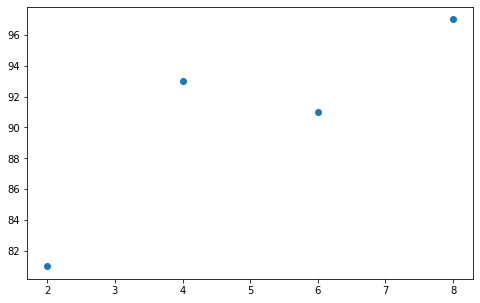

epoch=0.000000, 기울기=23.2000, 절편=4.5250
epoch=100.000000, 기울기=7.9316, 절편=45.3932
epoch=200.000000, 기울기=4.7953, 절편=64.1094
epoch=300.000000, 기울기=3.4056, 절편=72.4022
epoch=400.000000, 기울기=2.7899, 절편=76.0766
epoch=500.000000, 기울기=2.5171, 절편=77.7047
epoch=600.000000, 기울기=2.3962, 절편=78.4261
epoch=700.000000, 기울기=2.3426, 절편=78.7457
epoch=800.000000, 기울기=2.3189, 절편=78.8873
epoch=900.000000, 기울기=2.3084, 절편=78.9501
epoch=1000.000000, 기울기=2.3037, 절편=78.9779
epoch=1100.000000, 기울기=2.3016, 절편=78.9902
epoch=1200.000000, 기울기=2.3007, 절편=78.9957
epoch=1300.000000, 기울기=2.3003, 절편=78.9981
epoch=1400.000000, 기울기=2.3001, 절편=78.9991
epoch=1500.000000, 기울기=2.3001, 절편=78.9996
epoch=1600.000000, 기울기=2.3000, 절편=78.9998
epoch=1700.000000, 기울기=2.3000, 절편=78.9999
epoch=1800.000000, 기울기=2.3000, 절편=79.0000
epoch=1900.000000, 기울기=2.3000, 절편=79.0000
epoch=2000.000000, 기울기=2.3000, 절편=79.0000


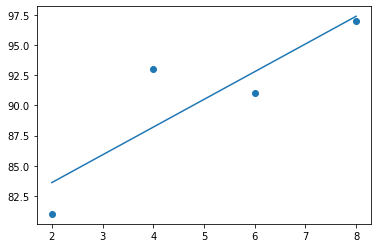

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간 x와 성적 y의 리스트 만들기
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# 그래프
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.show()

# 리스트로 되어 있는 x와 y 값을 넘파이 배열로 바꾸기
x_data = np.array(x)
y_data = np.array(y)

# 기울기 a와 절편 b의 값 초기화
a = 0
b = 0

# 학습률
lr = 0.05

# 몇번 반복될지 설정
epochs = 2001

# 경사 하강법
for i in range(epochs):
  y_pred = a * x_data + b # 오차 함수인 y = ax + b를 정의한 부분
  error = y_data - y_pred # 실제값 - 예측값, 즉 오차를 구하는 식
  
  a_diff = -(1 / len(x_data)) * sum(x_data * (error)) # 평균 제곱 오차를 a로 미분한 결과
  b_diff = -(1 / len(x_data)) * sum(y_data - y_pred) # 평균 제곱 오차를 b로 미분한 결과

  a = a - lr * a_diff # 학습률을 곱해 기존의 a값 업데이트
  b = b - lr * b_diff # 학습률을 곱해 기존의 b값 업데이트

  # 100번 반복될 때마다 현재의 a값, b값 출력
  if i % 100 == 0:
    print('epoch=%f, 기울기=%.04f, 절편=%.04f' %(i, a, b))

y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

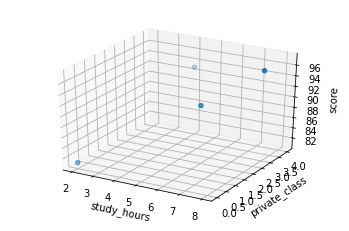

epoch=0.000000, 기울기1=23.2000, 기울기2=10.5625, 절편=4.5250
epoch=100.000000, 기울기1=6.4348, 기울기2=3.9893, 절편=43.9757
epoch=200.000000, 기울기1=3.7255, 기울기2=3.0541, 절편=62.5766
epoch=300.000000, 기울기1=2.5037, 기울기2=2.6323, 절편=70.9656
epoch=400.000000, 기울기1=1.9527, 기울기2=2.4420, 절편=74.7491
epoch=500.000000, 기울기1=1.7042, 기울기2=2.3562, 절편=76.4554
epoch=600.000000, 기울기1=1.5921, 기울기2=2.3175, 절편=77.2250
epoch=700.000000, 기울기1=1.5415, 기울기2=2.3001, 절편=77.5720
epoch=800.000000, 기울기1=1.5187, 기울기2=2.2922, 절편=77.7286
epoch=900.000000, 기울기1=1.5084, 기울기2=2.2886, 절편=77.7992
epoch=1000.000000, 기울기1=1.5038, 기울기2=2.2870, 절편=77.8310
epoch=1100.000000, 기울기1=1.5017, 기울기2=2.2863, 절편=77.8453
epoch=1200.000000, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1300.000000, 기울기1=1.5003, 기울기2=2.2858, 절편=77.8547
epoch=1400.000000, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8561
epoch=1500.000000, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=1600.000000, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8569
epoch=1700.000000, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8570
epo

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# 공부 시간 x와 성적 리스트 만들기
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

# 그래프로 확인
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('score')
ax.dist = 11
ax.scatter(x1, x2, y)
plt.show()

# 리스트로 되어 있는 x와 y값을 numpy배열로 바꾸기
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

# 기울기 a와 절편 b의 값 초기화
a1 = 0
a2 = 0
b = 0

# learning rate
lr = 0.05

# epochs
epochs = 2001

# start gradient descent
for i in range(epochs):
  y_pred = a1 * x1_data + a2 * x2_data + b
  error = y_data - y_pred

  a1_diff = -(1/len(x1_data)) * sum(x1_data * (error))
  a2_diff = -(1/len(x2_data)) * sum(x2_data *(error))
  b_diff = -(1/len(x1_data)) * sum(y_data - y_pred)

  a1 = a1 - lr * a1_diff
  a2 = a2 - lr * a2_diff
  b = b - lr * b_diff

  if i % 100 == 0:
    print('epoch=%f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f'%(i, a1, a2, b))



epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=-0.2799, 절편=-0.0685
epoch=0, 기울기=0.1932, 절편=-0.0212
epoch=0, 기울기=0.2480, 절편=-0.0166
epoch=0, 기울기=0.2694, 절편=-0.0151
epoch=1000, 기울기=1.4152, 절편=-11.7488
epoch=1000, 기울기=1.4148, 절편=-11.7489
epoch=1000, 기울기=1.4037, 절편=-11.7508
epoch=1000, 기울기=1.2547, 절편=-11.7694
epoch=1000, 기울기=1.4121, 절편=-11.7537
epoch=1000, 기울기=1.4154, 절편=-11.7534
epoch=1000, 기울기=1.4157, 절편=-11.7534
epoch=2000, 기울기=1.7580, 절편=-15.1655
epoch=2000, 기울기=1.7579, 절편=-15.1655
epoch=2000, 기울기=1.7550, 절편=-15.1660
epoch=2000, 기울기=1.6570, 절편=-15.1783
epoch=2000, 기울기=1.7566, 절편=-15.1683
epoch=2000, 기울기=1.7582, 절편=-15.1682
epoch=2000, 기울기=1.7583, 절편=-15.1682


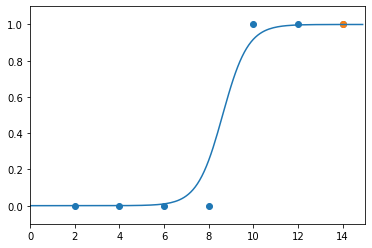

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [[2, 0], [4, 0], [6, 0], [8, 0], [10, 1], [12, 1],[14, 1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

a = 0
b = 0
lr = 0.05

def sigmoid(x):
  return 1 / (1 + np.e ** (-x))

for i in range(2001):
  for x_data, y_data in data:
    a_diff = x_data*(sigmoid(a * x_data + b) - y_data)
    b_diff = sigmoid(a * x_data + b) - y_data
    a = a - lr * a_diff
    b = b - lr * b_diff
    if i % 1000 == 0:
      print('epoch=%.f, 기울기=%.04f, 절편=%.04f'%(i, a, b))

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1))
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a * x + b) for x in x_range]))
plt.show()

In [1]:
import numpy as np

# weight and bias
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# perceptron
def MLP(x, w, b):
  y = np.sum(w * x) + b
  if y <= 0:
    return 0
  else:
    return 1

# NAND gate
def NAND(x1, x2):
  return MLP(np.array([x1, x2]), w11, b1)

# OR gate
def OR(x1, x2):
  return MLP(np.array([x1, x2]), w12, b2)

# AND gate
def AND(x1, x2):
  return MLP(np.array([x1, x2]), w2, b3)

# XOR gate
def XOR(x1, x2):
  return AND(NAND(x1, x2), OR(x1, x2))

for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
  y = XOR(x[0], x[1])
  print('input:'+str(x) + ' output:'+str(y))


input:(0, 0) output:0
input:(1, 0) output:1
input:(0, 1) output:1
input:(1, 1) output:0
